In [90]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.13 -m pip install --upgrade pip
error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this er

In [91]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [92]:
# Load the data
df_main = pd.read_csv("../datasets/life_expectancy_dataset.csv", delimiter=";")

# General Information
print(df_main.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13545 entries, 0 to 13544
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   country_code           13545 non-null  object
 1   country_name           13545 non-null  object
 2   region                 13545 non-null  object
 3   sub-region             13545 non-null  object
 4   intermediate-region    5670 non-null   object
 5   year                   13545 non-null  int64 
 6   life_expectancy_women  13545 non-null  object
 7   life_expectancy_men    13545 non-null  object
dtypes: int64(1), object(7)
memory usage: 846.7+ KB
None


In [93]:
# Display the many examples of life expectancy

df_sample = df_main.sample(10)
display(df_sample)

,country_code,country_name,region,sub-region,intermediate-region,year,life_expectancy_women,life_expectancy_men
804,AUT,AUSTRIA,EUROPE,WESTERN EUROPE,NaN,2008,"83,30","77,70"
5715,IRQ,IRAQ,ASIA,WESTERN ASIA,NaN,2005,"69,87","60,14"
520,ARG,ARGENTINA,AMERICAS,LATIN AMERICA AND THE CARIBBEAN,SOUTH AMERICA,1976,"71,49","63,37"
684,ABW,ARUBA,AMERICAS,LATIN AMERICA AND THE CARIBBEAN,CARIBBEAN,2014,"78,61","72,45"
5895,IMN,ISLA DE MAN,EUROPE,NORTHERN EUROPE,NaN,1996,"76,98","70,56"
1321,BEN,BENIN,AFRICA,SUB-SAHARAN AFRICA,WESTERN AFRICA,2021,"61,45","58,22"
10699,SYR,REPÚBLICA ÁRABE SIRIA,ASIA,WESTERN ASIA,NaN,2012,"71,82","62,43"
86,ALB,ALBANIA,EUROPE,SOUTHERN EUROPE,NaN,1983,"74,15","68,55"
12407,TJK,TAYIKISTÁN,ASIA,CENTRAL ASIA,NaN,2019,"73,01","68,86"
11295,STP,SANTO TOMÉ Y PRÍNCIPE,AFRICA,SUB-SAHARAN AFRICA,MIDDLE AFRICA,1978,"61,01","57,71"


In [94]:
# delete many columns
cols = ["sub-region", "intermediate-region"]
df_main = df_main.drop(cols, axis=1)

# change name columns

new_cols={
    "life_expectancy_women":"female",
    "life_expectancy_men":"male"
}

df_main=df_main.rename(columns=new_cols)

# Display columns
print(df_main.columns)

Index(['country_code', 'country_name', 'region', 'year', 'female', 'male'], dtype='object')


In [95]:
# Get the first element of the string
df_main['female'] = df_main['female'].str.split(",").str[0]
df_main["male"] = df_main['male'].str.split(",").str[0]

# Convert to int
df_main['male'] = df_main['male'].astype(int)
df_main['female'] = df_main['female'].astype(int)

In [96]:
# show countries
display(df_main['country_name'].unique())

# show total count country
len(df_main['country_name'].unique().tolist())

# show count by country
df_main['country_code'].value_counts(ascending=False)



array(['AFGANISTÁN', 'ALBANIA', 'ALEMANIA', 'ANDORRA', 'ANGOLA',
       'ANTIGUA Y BARBUDA', 'ARABIA SAUDITA', 'ARGELIA', 'ARGENTINA',
       'ARMENIA', 'ARUBA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIYÁN',
       'BAHAMAS', 'BAHREIN', 'BANGLADESH', 'BARBADOS', 'BELARÚS',
       'BELICE', 'BENIN', 'BERMUDAS', 'BHUTÁN', 'BOLIVIA',
       'BOSNIA Y HERZEGOVINA', 'BOTSWANA', 'BRASIL', 'BRUNEI DARUSSALAM',
       'BULGARIA', 'BURKINA FASO', 'BURUNDI', 'BÉLGICA', 'CABO VERDE',
       'CAMBOYA', 'CAMERÚN', 'CANADÁ', 'CHAD', 'CHILE', 'CHINA', 'CHIPRE',
       'COLOMBIA', 'COMORAS', 'CONGO, REPÚBLICA DEL',
       'CONGO, REPÚBLICA DEMOCRÁTICA DEL', 'COREA, REPÚBLICA DE',
       'COREA, REPÚBLICA POPULAR DEMOCRÁTICA DE', 'COSTA RICA', 'CROACIA',
       'CUBA', 'CURACAO', "CÔTE D'IVOIRE", 'DINAMARCA', 'DJIBOUTI',
       'DOMINICA', 'ECUADOR', 'EGIPTO, REPÚBLICA ÁRABE DE', 'EL SALVADOR',
       'EMIRATOS ÁRABES UNIDOS', 'ERITREA', 'ESLOVENIA', 'ESPAÑA',
       'ESTADOS UNIDOS', 'ESTONIA', 'ESWATINI', 'E

country_code
AFG    63
ALB    63
DEU    63
AND    63
AGO    63
       ..
VEN    63
VNM    63
YEM    63
ZMB    63
ZWE    63
Name: count, Length: 215, dtype: int64

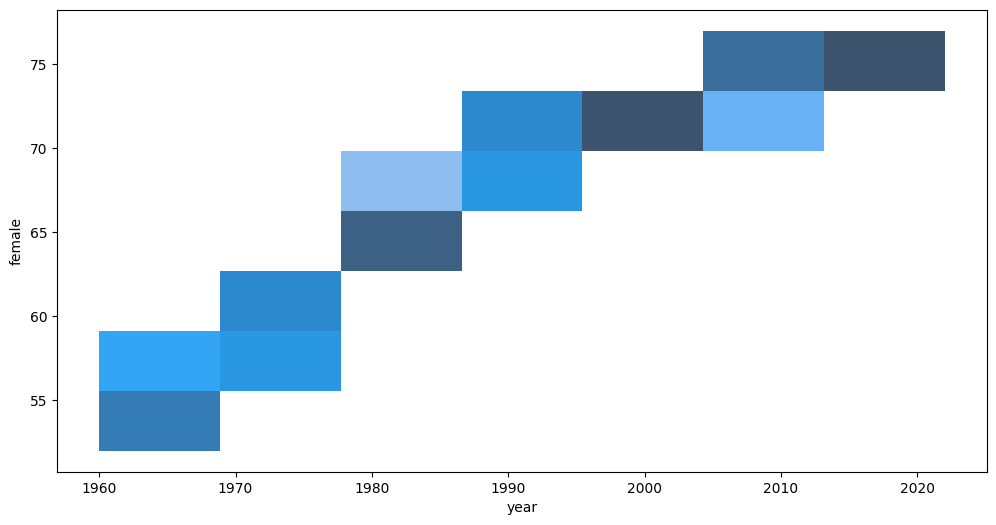

In [114]:
df_filter = df_main[(df_main['country_name'] == "REPÚBLICA DOMINICANA")]

sns.histplot(y=df_filter["female"], x=df_filter['year'])
plt.gcf().set_size_inches(12, 6)
plt.show()